# 예상매출 회귀분석<br>

### 라이브러리

In [1]:
import numpy as np
import pandas as pd
import sklearn as skl
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn.preprocessing import RobustScaler

### <br>데이터 입력

In [2]:
data_input = pd.read_csv(r'C:\Users\admin\Desktop\Hustar\작업 엑셀_최종\작업 엑셀_최종\소득소비_유동인구_다중회귀\통합문서_다시.csv')

### <br>데이터 확인

In [3]:
data_input

,행 레이블,평균 : 총_유동인구_수,총 상주인구 수,총_직장_인구_수,평균 : 월_평균_소득_금액,평균 : 지출_총금액,평균 : 당월_매출_금액
0,1000001,1.285792e+06,1800,842,3783725,2927151544,6.788332e+08
1,1000002,3.943541e+06,941,201,3665126,5403471264,9.217054e+08
2,1000003,2.184229e+06,1214,3686,3192740,2753854220,1.713149e+09
3,1000004,3.318473e+06,1442,56,3282965,4251573887,1.722263e+08
4,1000005,4.583172e+05,1671,1797,4545914,2961934404,2.315643e+08
...,...,...,...,...,...,...,...
1003,1001006,5.845556e+06,4159,239,3667573,9677203365,4.422260e+08
1004,1001007,1.198691e+06,2044,486,3054443,2119012147,5.195057e+08
1005,1001008,7.631875e+06,2360,177,3289770,6868562895,1.925643e+09
1006,1001009,9.094054e+06,3688,420,3469075,9663549099,9.022777e+08


#### <br>pyplot을 위한 한글 폰트 설치

In [4]:
plt.rc('font', family='Malgun Gothic')

### <br>산점도를 통한 데이터 확인

##### 유동인구 - 매출

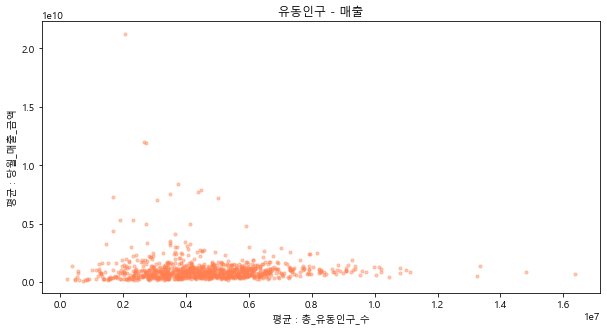

In [5]:
data_input.plot(kind='scatter', x='평균 : 총_유동인구_수', y='평균 : 당월_매출_금액', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('유동인구 - 매출')
plt.show()
plt.close()

##### 상주인구 - 매출

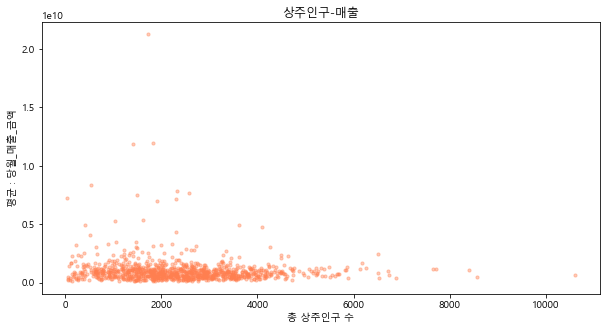

In [6]:
data_input.plot(kind='scatter', x='총 상주인구 수', y='평균 : 당월_매출_금액', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('상주인구-매출')
plt.show()
plt.close()

##### 직장인구 - 매출

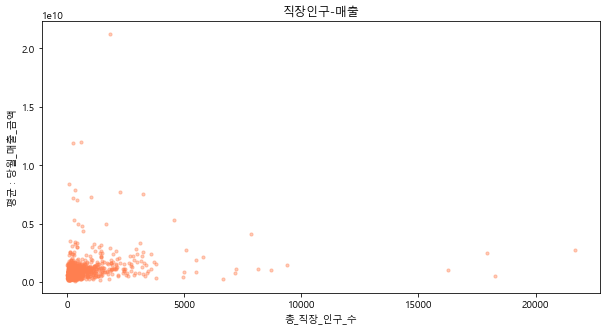

In [7]:
data_input.plot(kind='scatter', x='총_직장_인구_수', y='평균 : 당월_매출_금액', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('직장인구-매출')
plt.show()
plt.close()

##### 월 평균 소득 - 매출

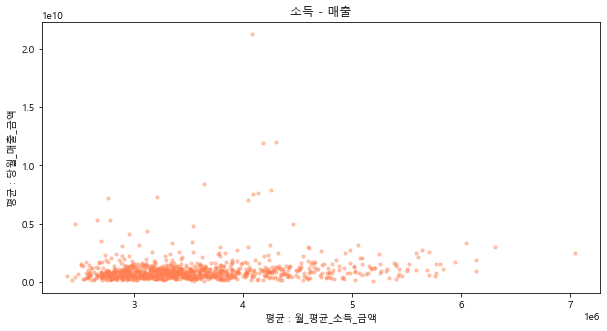

In [8]:
data_input.plot(kind='scatter', x='평균 : 월_평균_소득_금액', y='평균 : 당월_매출_금액', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('소득 - 매출')
plt.show()
plt.close()

##### 지출 총 금액 - 매출

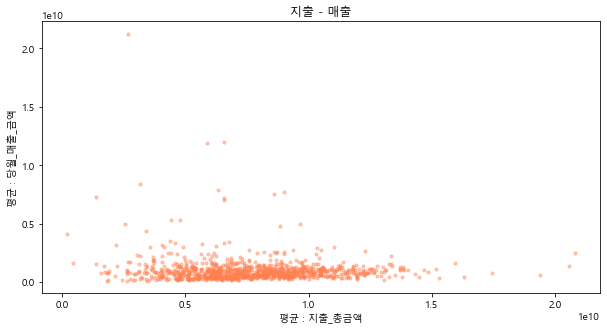

In [9]:
data_input.plot(kind='scatter', x='평균 : 지출_총금액', y='평균 : 당월_매출_금액', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('지출 - 매출')
plt.show()
plt.close()

<br>y값인 '평균 : 당월_매출_금액'에서 특히 눈에 띄는 이상치 세 가지를 제거해준다.

### <br>이상치 처리 - 높은 매출 10개 항 제거

##### 높은 매출 순으로 정렬

In [10]:
data_input.sort_values(by='평균 : 당월_매출_금액', ascending=False)

,행 레이블,평균 : 총_유동인구_수,총 상주인구 수,총_직장_인구_수,평균 : 월_평균_소득_금액,평균 : 지출_총금액,평균 : 당월_매출_금액
78,1000079,2.059651e+06,1724,1841,4082857,2674219045,2.125621e+10
64,1000065,2.674543e+06,1837,609,4302845,6567890172,1.196663e+10
65,1000066,2.724843e+06,1406,243,4179713,5860536617,1.188070e+10
191,1000192,3.760467e+06,539,72,3638786,3134170904,8.396327e+09
66,1000067,4.464595e+06,2330,341,4257136,6340909362,7.857568e+09
...,...,...,...,...,...,...,...
340,1000341,5.330085e+06,2755,105,2885119,6842927296,1.641458e+08
972,1000975,7.818716e+05,1560,108,2776607,2412176955,1.624935e+08
396,1000397,1.523299e+06,153,128,3644941,3430864489,1.468422e+08
656,1000657,5.938726e+05,1876,227,3545931,1812112959,1.388510e+08


##### 가장 높은 매출 10개 행에 대한 삭제를 시행

In [11]:
data_input=data_input.sort_values(by='평균 : 당월_매출_금액', ascending=False)
outlier=data_input[:][0:10].index
data_input=data_input.drop(outlier)

### <br>이상치 처리 - 유동 인구 높은 4개 항 제거

In [12]:
data_input.sort_values(by='총 상주인구 수', ascending=False)
data_input=data_input.sort_values(by='총 상주인구 수', ascending=False)
outlier=data_input[:][0:4].index
data_input=data_input.drop(outlier)

### <br>이상치 처리 - 상주 인구 높은 1개 항 제거

In [13]:
data_input.sort_values(by='평균 : 총_유동인구_수', ascending=False)
data_input=data_input.sort_values(by='평균 : 총_유동인구_수', ascending=False)
outlier=data_input[:][0:4].index
data_input=data_input.drop(outlier)

### <br>이상치 처리 - 직장 인구 높은 4개 항 제거

In [14]:
data_input.sort_values(by='총_직장_인구_수', ascending=False)
data_input=data_input.sort_values(by='총_직장_인구_수', ascending=False)
outlier=data_input[:][0:4].index
data_input=data_input.drop(outlier)

##### <br>이상치 제거된 모습

In [15]:
data_input

,행 레이블,평균 : 총_유동인구_수,총 상주인구 수,총_직장_인구_수,평균 : 월_평균_소득_금액,평균 : 지출_총금액,평균 : 당월_매출_금액
928,1000931,2040623.250,2640,9367,5402626,5274709704,1.428417e+09
79,1000080,1684003.500,643,8713,4825561,2640857587,1.049843e+09
76,1000077,3636233.083,2695,8152,3627658,8409622259,1.110385e+09
38,1000039,3646656.667,522,7830,2954105,201368577,4.105227e+09
901,1000904,5834180.833,5822,7206,5830787,12442048602,1.120817e+09
...,...,...,...,...,...,...,...
24,1000025,3139466.417,886,13,4615780,5569788388,3.857014e+08
838,1000840,3509164.583,1508,11,3434495,6143896990,5.598341e+08
413,1000414,2482977.417,273,9,3291995,6666962554,3.080669e+08
329,1000330,5329040.167,1326,7,3697552,9792456264,5.749094e+08


In [16]:
data_input=data_input.drop('행 레이블', axis=1)

In [17]:
data_input

,평균 : 총_유동인구_수,총 상주인구 수,총_직장_인구_수,평균 : 월_평균_소득_금액,평균 : 지출_총금액,평균 : 당월_매출_금액
928,2040623.250,2640,9367,5402626,5274709704,1.428417e+09
79,1684003.500,643,8713,4825561,2640857587,1.049843e+09
76,3636233.083,2695,8152,3627658,8409622259,1.110385e+09
38,3646656.667,522,7830,2954105,201368577,4.105227e+09
901,5834180.833,5822,7206,5830787,12442048602,1.120817e+09
...,...,...,...,...,...,...
24,3139466.417,886,13,4615780,5569788388,3.857014e+08
838,3509164.583,1508,11,3434495,6143896990,5.598341e+08
413,2482977.417,273,9,3291995,6666962554,3.080669e+08
329,5329040.167,1326,7,3697552,9792456264,5.749094e+08


### 산점도 다시 그리기

##### 유동인구 - 매출

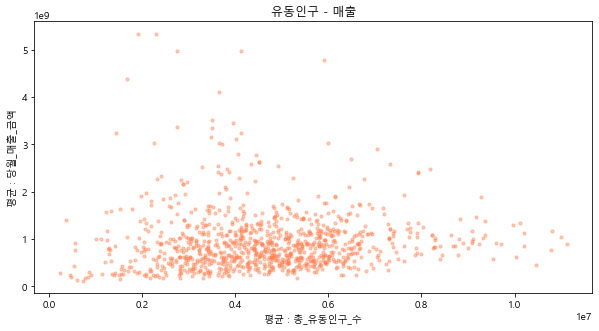

In [18]:
data_input.plot(kind='scatter', x='평균 : 총_유동인구_수', y='평균 : 당월_매출_금액', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('유동인구 - 매출')
plt.show()
plt.close()

##### 상주인구 - 매출

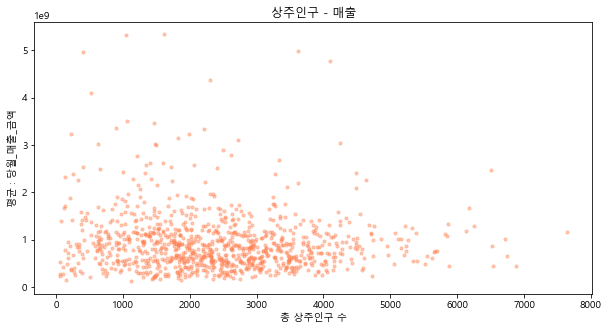

In [19]:
data_input.plot(kind='scatter', x='총 상주인구 수', y='평균 : 당월_매출_금액', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('상주인구 - 매출')
plt.show()
plt.close()

##### 직장인구 - 매출

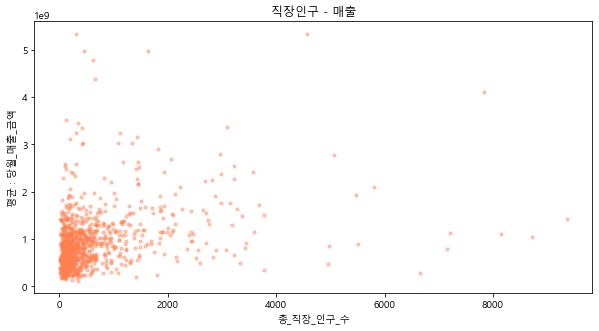

In [20]:
data_input.plot(kind='scatter', x='총_직장_인구_수', y='평균 : 당월_매출_금액', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('직장인구 - 매출')
plt.show()
plt.close()

##### 월 평균 소득 - 매출

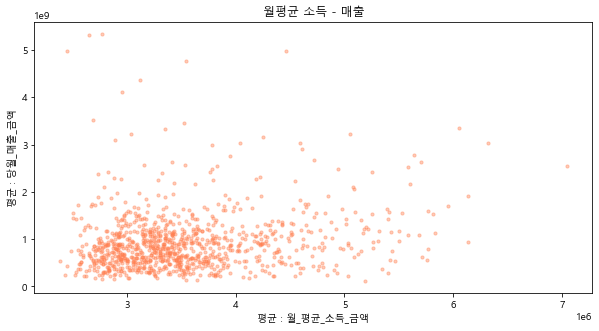

In [21]:
data_input.plot(kind='scatter', x='평균 : 월_평균_소득_금액', y='평균 : 당월_매출_금액', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('월평균 소득 - 매출')
plt.show()
plt.close()

##### 지출 총 금액 - 매출

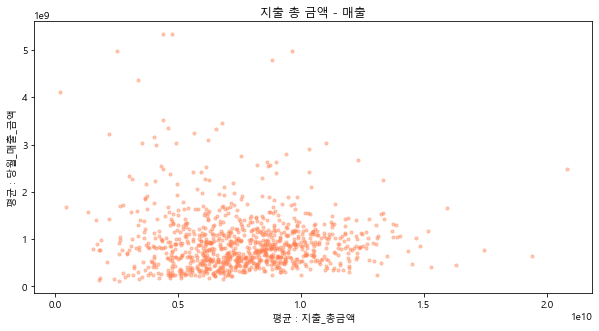

In [22]:
data_input.plot(kind='scatter', x='평균 : 지출_총금액', y='평균 : 당월_매출_금액', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('지출 총 금액 - 매출')
plt.show()
plt.close()

### <br>데이터 전처리

#### 계산을 위해 넘파이화

In [23]:
data_input=data_input.to_numpy()

In [24]:
data_input

array([[2.04062325e+06, 2.64000000e+03, 9.36700000e+03, 5.40262600e+06,
        5.27470970e+09, 1.42841668e+09],
       [1.68400350e+06, 6.43000000e+02, 8.71300000e+03, 4.82556100e+06,
        2.64085759e+09, 1.04984274e+09],
       [3.63623308e+06, 2.69500000e+03, 8.15200000e+03, 3.62765800e+06,
        8.40962226e+09, 1.11038487e+09],
       ...,
       [2.48297742e+06, 2.73000000e+02, 9.00000000e+00, 3.29199500e+06,
        6.66696255e+09, 3.08066886e+08],
       [5.32904017e+06, 1.32600000e+03, 7.00000000e+00, 3.69755200e+06,
        9.79245626e+09, 5.74909364e+08],
       [3.34019917e+06, 2.45000000e+02, 6.00000000e+00, 2.53129200e+06,
        2.21611809e+09, 1.41604442e+09]])

#### <br>data_input값을 받아 매출과 지출에서 $10^8$을 나누고 유동인구와 소득에서 $10^4$를 나눔

매출, 지출 단위 : 억<br>
유동인구, 소득 단위 : 만

In [25]:
yoodong, sang_jik, sodeuk, jichul, y_input = np.hsplit(data_input, [1, 3, 4, 5])
yoodong=yoodong/(10**4)
sodeuk = sodeuk/(10**4)
jichul = jichul/(10**8)
y_input=y_input/(10**8)
x_input=np.hstack((yoodong, sang_jik, sodeuk, jichul))
y_input=np.round(y_input, 3)
x_input=np.round(x_input, 3)

In [26]:
y_input

array([[14.284],
       [10.498],
       [11.104],
       [41.052],
       [11.208],
       [ 7.762],
       [ 2.757],
       [21.025],
       [ 8.868],
       [19.213],
       [27.676],
       [ 8.596],
       [ 4.668],
       [53.41 ],
       [ 3.327],
       [15.14 ],
       [17.131],
       [11.381],
       [24.146],
       [ 9.225],
       [ 8.119],
       [14.892],
       [ 4.961],
       [16.384],
       [25.435],
       [ 6.681],
       [22.643],
       [12.922],
       [17.571],
       [33.58 ],
       [ 7.589],
       [23.775],
       [17.502],
       [27.891],
       [ 7.715],
       [18.966],
       [ 6.266],
       [22.43 ],
       [13.113],
       [13.982],
       [15.544],
       [ 9.027],
       [22.208],
       [16.079],
       [ 4.855],
       [ 7.589],
       [ 5.86 ],
       [10.949],
       [ 9.547],
       [11.348],
       [ 9.629],
       [15.799],
       [10.871],
       [ 7.859],
       [16.382],
       [20.986],
       [ 5.333],
       [ 6.222],
       [13.154

### <br>Train & Test Data split

In [27]:
x_train=x_input[:800]
x_test=x_input[800:]
y_train=y_input[:800]
y_test=y_input[800:]

### <br>모델 생성

In [38]:
model = Sequential()
model.add(Dense(5, activation='linear'))
model.add(Dense(1))

tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, amsgrad=False, name='Adam')

model.compile(loss="mse", metrics=["mse"])

model.fit(x_train, y_train, batch_size=1, epochs=20, shuffle=False)

Epoch 1/20
800/800 [==============================] - 1s 384us/step - loss: 1199760.3750 - mse: 1199760.3750
Epoch 2/20
800/800 [==============================] - 0s 388us/step - loss: 1169810.5000 - mse: 1169810.5000
Epoch 3/20
800/800 [==============================] - 0s 402us/step - loss: 55428.9297 - mse: 55428.9297
Epoch 4/20
800/800 [==============================] - 0s 385us/step - loss: 215.5533 - mse: 215.5533
Epoch 5/20
800/800 [==============================] - 0s 378us/step - loss: 162.3657 - mse: 162.3657
Epoch 6/20
800/800 [==============================] - 0s 384us/step - loss: 128.2868 - mse: 128.2868
Epoch 7/20
800/800 [==============================] - 0s 403us/step - loss: 111.1456 - mse: 111.1456
Epoch 8/20
800/800 [==============================] - 0s 398us/step - loss: 102.0694 - mse: 102.0694
Epoch 9/20
800/800 [==============================] - 0s 385us/step - loss: 92.6097 - mse: 92.6097
Epoch 10/20
800/800 [==============================] - 0s 380us/step - lo

### <br>테스트 데이터 확인

In [39]:
model_predict=model.predict(x_test)

In [40]:
model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 646us/step - loss: 21.7755 - mse: 21.7755


[21.77549171447754, 21.77549171447754]

### <br>예측값 그래프 그리기

In [41]:
data_predict=np.hstack((model_predict, x_test))

##### <br>예측값 넘파이로 받아서 독립변수당 하나. 즉 3개로 나누어서 판다스로 바꿈

In [42]:
x_test1_np, x_test2_np, x_test3_np, x_test4_np, x_test5_np = np.hsplit(x_test, [1,2,3,4])

data1_np=np.hstack((model_predict, x_test1_np))
data2_np=np.hstack((model_predict, x_test2_np))
data3_np=np.hstack((model_predict, x_test3_np))
data4_np=np.hstack((model_predict, x_test4_np))
data5_np=np.hstack((model_predict, x_test5_np))

predict1=pd.DataFrame(data1_np, columns=['매출', '유동인구'])
predict2=pd.DataFrame(data2_np, columns=['매출', '상주인구'])
predict3=pd.DataFrame(data3_np, columns=['매출', '직장인구'])
predict4=pd.DataFrame(data4_np, columns=['매출', '소득'])
predict5=pd.DataFrame(data5_np, columns=['매출', '지출'])

predict1

,매출,유동인구
0,12.552042,370.734
1,10.826664,345.768
2,15.420140,732.135
3,10.667719,484.576
4,12.248783,596.964
...,...,...
181,10.447514,313.947
182,7.204834,350.916
183,8.264559,248.298
184,10.837041,532.904


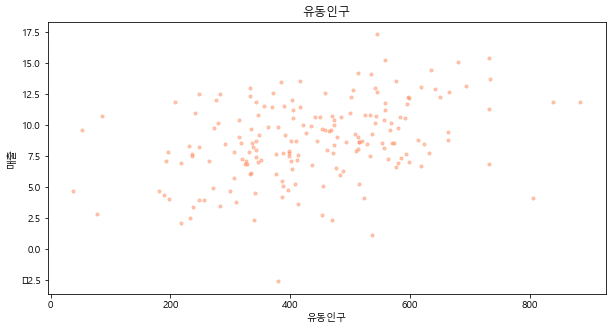

In [48]:
predict1.plot(kind='scatter', x='유동인구', y='매출', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('유동인구')
plt.show()
plt.close()

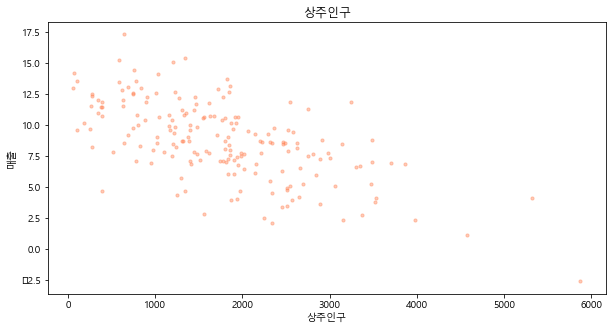

In [44]:
predict2.plot(kind='scatter', x='상주인구', y='매출', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('상주인구')
plt.show()
plt.close()

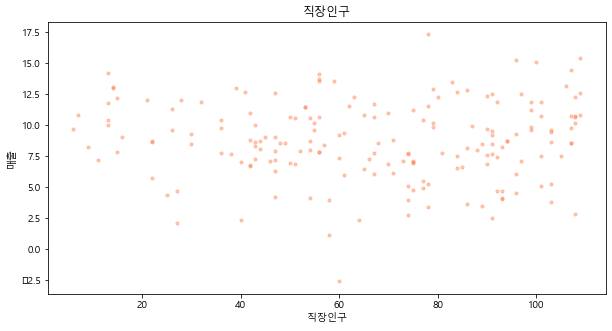

In [45]:
predict3.plot(kind='scatter', x='직장인구', y='매출', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('직장인구')
plt.show()
plt.close()

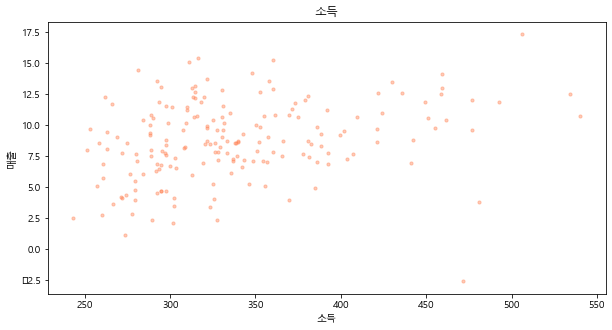

In [46]:
predict4.plot(kind='scatter', x='소득', y='매출', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('소득')
plt.show()
plt.close()

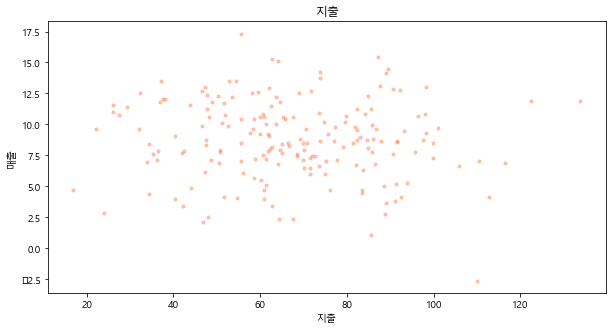

In [47]:
predict5.plot(kind='scatter', x='지출', y='매출', c='coral', s=10, figsize=(10, 5), alpha=0.4)
plt.title('지출')
plt.show()
plt.close()

<br>1차 : 2억 7천만 loss<br>
2차 : 8천 loss<br>
3차 : 0.2302 loss (정규화)<br>
4차 : 1.7715 loss (단위맞춤)<br>
5차 : 1.4482 loss (단위맞춤)<br>

#### <br>Weight, bias값 뽑아내기

In [49]:
weight1=model.layers[0].get_weights()
weight2=model.layers[1].get_weights()

np.savetxt("weight1.csv",weight1[0],fmt='%s',delimiter=",")
np.savetxt("weight2.csv",weight2[0],fmt='%s',delimiter=",")

np.savetxt("bias1.csv",weight1[1],fmt='%s',delimiter=",")
np.savetxt("bias2.csv",weight2[1],fmt='%s',delimiter=",")